https://www.kaggle.com/datasets/anuragupadhyaya/anticancer-peptides-data-set

In [118]:
using Random

"""
Construct a binary vector. By default 10000 elements long.
"""
bitHDV(N::Int=10000) = bitrand(N)


"""
Bundles binary hyperdimensional vectors based on the element-wise majority rule.
"""
function bitadd(vectors::BitVector ...)
    v = reduce(.+, vectors)
    n = length(vectors) / 2
    x = [i > n ? 1 : i < n ? 0 : rand(0:1) for i in v]
    return convert(BitVector, x)
end


"""
Binds binary hyperdimensional vectors based on an element-wise XOR gate.
"""
bitbind(vectors::BitVector ...) =  reduce(.⊻, vectors)


"""
Permutes a binary hyperdimensional vector by an adjustable circular shift.
"""
bitperm(vector::BitVector, k::Int=1) = circshift(vector, k)


"""
Calculates the Hamming distance between two binary vectors.
"""
hamming(x::BitVector, y::BitVector) = sum(x .!= y)/length(x)

hamming

Data contains sequences of four classes: very active in anticancer acitivity, moderately active, inactive (exp) and inactive (virtual) (difference?)

In [119]:
using DataFrames, CSV
data = CSV.read("ProtExdata/ACPs_Breast_cancer.csv", DataFrame)

,ID,sequence,class
,Int64,String,String31
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
4,4,ESFSDWWKLLAE,mod. active
5,5,ETFADWWKLLAE,mod. active
6,6,ETFSDWWKLLAE,mod. active
7,7,FAKALAKLAKKLL,mod. active
8,8,FAKALKALLKALKAL,inactive - exp
9,9,FAKFLAKFLKKAL,mod. active


In [120]:
unique(data.class)
class_num = [i == "very active" ? 1 : i == "mod. active" ? 2 : i == "inactive - exp" ? 3 : 4 for i in data.class]
data[!, :class_num] = class_num
data = data[data.class_num .!= 4, :]
first(data, 5)

,ID,sequence,class,class_num
,Int64,String,String31,Int64
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active,2
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active,2
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active,2
4,4,ESFSDWWKLLAE,mod. active,2
5,5,ETFADWWKLLAE,mod. active,2


Attach to each amino acid a random hdv (improvement should be seen in more realistic representations, hdvs from embeddings)

In [121]:
AA_list = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'O', 'U', 'B', 'J', 'Z', 'X']
AA_hdv = [bitHDV() for i in AA_list]
AA_dict = Dict(zip(AA_list, AA_hdv))

Dict{Char, BitVector} with 26 entries:
  'E' => [1, 1, 1, 1, 0, 1, 0, 0, 1, 0  …  1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
  'Z' => [1, 0, 0, 1, 0, 0, 1, 1, 0, 1  …  0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
  'X' => [0, 1, 0, 0, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
  'C' => [1, 1, 0, 1, 0, 1, 1, 0, 0, 0  …  0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
  'B' => [1, 0, 0, 0, 0, 1, 0, 1, 1, 1  …  0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
  'D' => [0, 0, 1, 1, 0, 1, 0, 1, 0, 0  …  1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
  'A' => [0, 1, 0, 0, 0, 1, 1, 0, 0, 1  …  1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
  'R' => [1, 1, 0, 0, 1, 1, 0, 1, 1, 0  …  1, 1, 0, 1, 1, 1, 0, 0, 0, 0]
  'G' => [1, 1, 1, 0, 0, 1, 1, 0, 1, 1  …  1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
  'N' => [0, 1, 0, 1, 1, 1, 0, 0, 1, 1  …  0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
  'Q' => [1, 1, 0, 0, 1, 1, 1, 1, 0, 1  …  1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
  'M' => [0, 1, 1, 1, 1, 1, 1, 0, 1, 0  …  1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
  'K' => [1, 0, 0, 1, 1, 0, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
  'F' => [1,

Make list of every possible comibination of trimer. Trimer hdv is made by binding the three hdvs and applying bitperm to include sequence info

In [122]:
trimer_hdvs = Dict(aa1 * aa2 * aa3 => 
bitbind(AA_dict[aa1], bitperm(AA_dict[aa2]), bitperm(AA_dict[aa3], 2)) 
for aa1 in AA_list for aa2 in AA_list for aa3 in AA_list)

Dict{String, BitVector} with 17576 entries:
  "HTY" => [0, 0, 1, 1, 0, 0, 0, 0, 1, 1  …  0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
  "HBJ" => [0, 0, 1, 1, 1, 0, 1, 0, 0, 0  …  0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
  "MSW" => [1, 1, 1, 1, 1, 1, 0, 1, 0, 1  …  1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
  "BKI" => [1, 1, 1, 1, 0, 0, 0, 1, 1, 1  …  1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
  "ETI" => [0, 0, 0, 0, 0, 0, 0, 0, 1, 0  …  0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
  "OLQ" => [1, 0, 0, 1, 1, 0, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
  "NMD" => [1, 0, 1, 0, 1, 1, 1, 0, 1, 1  …  1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
  "YVC" => [1, 0, 1, 0, 1, 1, 1, 0, 1, 1  …  1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
  "QPE" => [1, 0, 0, 0, 0, 0, 0, 1, 1, 1  …  1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
  "KIW" => [1, 0, 1, 1, 1, 1, 0, 1, 1, 1  …  1, 0, 1, 0, 0, 0, 1, 1, 0, 0]
  "BPX" => [0, 1, 1, 0, 0, 1, 0, 1, 1, 0  …  0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
  "NLG" => [0, 0, 1, 1, 0, 0, 1, 0, 0, 1  …  0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
  "YWG" => [1, 0, 1, 0, 1, 0, 1, 0, 0, 0  …  1, 1, 1, 1,

Bundle every possible trimer into a hdv to represent a full sequence

In [123]:
function embedder(sequence)
    l = [trimer_hdvs[sequence[i:i+2]] for i in 1:length(sequence)-2]
    v = bitadd(hcat(l)...)
    return v
end

embedder (generic function with 1 method)

In [124]:
l = BitVector[]
for i in data.sequence
    push!(l, embedder(i))
end
data[!, :hdv] = l

197-element Vector{BitVector}:
 [1, 0, 0, 0, 0, 0, 1, 1, 1, 1  …  1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 1, 1, 0, 0, 0, 1, 1  …  1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
 [1, 1, 0, 0, 1, 0, 1, 1, 0, 0  …  1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
 [1, 1, 1, 1, 0, 0, 1, 1, 0, 1  …  0, 0, 1, 0, 0, 1, 0, 1, 1, 1]
 [1, 1, 1, 0, 1, 0, 1, 0, 0, 1  …  0, 0, 1, 0, 0, 1, 0, 1, 1, 0]
 [1, 1, 0, 1, 0, 0, 1, 1, 0, 1  …  0, 0, 1, 0, 0, 1, 0, 1, 0, 0]
 [0, 0, 1, 0, 1, 0, 0, 1, 0, 1  …  1, 0, 0, 0, 1, 1, 0, 0, 1, 1]
 [0, 0, 0, 1, 0, 0, 1, 1, 0, 0  …  0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
 [0, 0, 0, 1, 1, 1, 0, 1, 1, 1  …  0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
 [0, 1, 1, 0, 0, 0, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
 [0, 0, 1, 1, 0, 1, 1, 1, 0, 0  …  0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
 [0, 1, 1, 0, 1, 1, 0, 1, 0, 1  …  0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 1  …  1, 0, 0, 0, 1, 1, 0, 0, 0, 1]
 ⋮
 [0, 1, 1, 0, 1, 0, 0, 1, 0, 1  …  1, 0, 0, 1, 0, 1, 0, 0, 0, 1]
 [0, 0, 1, 0, 0, 0, 1, 1, 0, 0  …  1, 0, 0, 1, 0, 1, 0, 

Bundle every sequence for each class

In [125]:
active_hdv = bitadd(hcat([i for i in data[data.class_num .== 1, :hdv]])...)
modactive_hdv = bitadd(hcat([i for i in data[data.class_num .== 2, :hdv]])...)
notactive_exp_hdv = bitadd(hcat([i for i in data[data.class_num .== 3, :hdv]])...)

10000-element BitVector:
 0
 1
 1
 0
 1
 1
 0
 1
 1
 1
 1
 0
 0
 ⋮
 0
 0
 1
 0
 0
 0
 1
 1
 0
 1
 1
 1

In [126]:
# A random active peptide
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_exp_hdv))

0.3077
0.36
0.3801


In [127]:
# A random mod. active peptide
println(hamming(data[data.sequence .== "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES", :hdv]..., notactive_exp_hdv))

0.5018
0.4897
0.504


In [128]:
# A random inactive (exp?) peptide
println(hamming(data[data.sequence .== "FAKIIAKIAKIAKKIL", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "FAKIIAKIAKIAKKIL", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "FAKIIAKIAKIAKKIL", :hdv]..., notactive_exp_hdv))

0.4822
0.4625
0.4456


Very low variance explained, 2D PCA plots will probably look nonsensical

In [147]:
using MultivariateStats

matrix_all = permutedims(hcat(data.hdv...))

S = fit(PCA, matrix_all; maxoutdim=2)
projS = projection(S)
S

PCA(indim = 197, outdim = 2, principalratio = 0.2165388948988325)

Pattern matrix (unstandardized loadings):
───────────────────────────────
              PC1           PC2
───────────────────────────────
1     0.0491753    -0.0161828
2     0.0486087    -0.0346906
3     0.00668142    0.0232965
4     0.0364191    -0.00632583
5     0.0472411    -0.0109542
6     0.0473993    -0.0109012
7     0.380491     -0.0526307
8     0.127802      0.28775
9     0.118238      0.0627357
10    0.0482385    -0.0330873
11    0.18483       0.299502
12    0.125273     -0.0493893
13    0.348298     -0.111326
14    0.367613     -0.0757986
15    0.376088     -0.104129
16    0.395615     -0.140959
17    0.344364     -0.0854503
18    0.346269     -0.0897595
19    0.370066     -0.105932
20    0.358116      0.0569742
21    0.30749      -0.0599164
22    0.387395     -0.0572702
23    0.365517     -0.0085955
24    0.32235      -0.115979
25    0.38082      -0.0315385
26    0.378887     -0.127367
27    0.374779     -0.1

In [130]:
indices = [[i for i in 1:nrow(data) if data.class_num[i] == j] for j in 1:3]

3-element Vector{Vector{Int64}}:
 [27, 28, 69, 86, 88, 91, 92, 93, 100, 127, 128, 138, 142, 154, 160, 177, 194, 196]
 [1, 2, 3, 4, 5, 6, 7, 9, 12, 16  …  174, 176, 178, 179, 182, 185, 186, 190, 193, 197]
 [8, 10, 11, 13, 14, 15, 17, 23, 25, 26  …  180, 181, 183, 184, 187, 188, 189, 191, 192, 195]

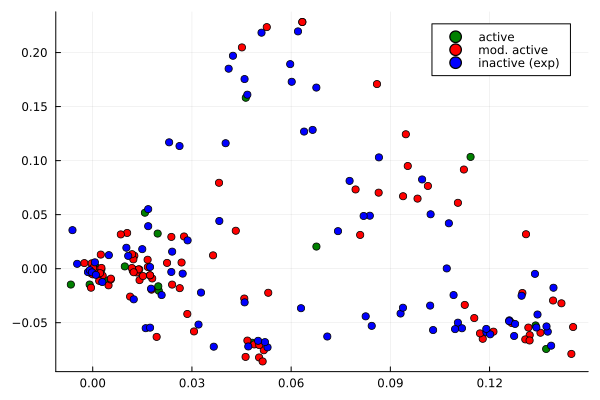

In [131]:
using Plots

function plotter()
    colors = [:green, :red, :blue]
    labels = ["active", "mod. active", "inactive (exp)"]
    fig = Plots.plot()

    for i in 1:3
        scatter!(fig, (projS[indices[i], 1], projS[indices[i], 2]), label=labels[i], mc = colors[i])
    end
    return fig
end

plotter()

PCA cant explain these vectors well enough in 2 dimensions! (highest explaind variance 3%...)
Let's build a simple classifier and test this. We will compare a test sequence to the 4 class hdvs and assume the lowest hamming distance to be the class

In [132]:
n = nrow(data)

train = rand(n) .< 0.8
test = train = .! train

train_df = data[[i for i in 1:n if train[i] == 1], :]
test_df = data[[i for i in 1:n if test[i] == 1], :]

active_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 1, :hdv]])...)
modactive_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 2, :hdv]])...)
notactive_exp_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 3, :hdv]])...)

10000-element BitVector:
 0
 1
 1
 0
 1
 1
 1
 1
 0
 0
 1
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 1
 1
 0
 1
 1
 1

In [133]:
function predict(seq)
    y = [hamming(active_hdv_t, seq), hamming(modactive_hdv_t, seq), hamming(notactive_exp_hdv_t, seq), hamming(notactive_virt_hdv_t, seq)]
    return findmin(y)[2]
end

predict (generic function with 1 method)

In [134]:
using StatsBase
pred = [predict(i) for i in test_df.hdv]
mean(test_df.class_num .== pred)

0.9210526315789473

Classifier seems to work great

In [145]:
data2 = data[data.class_num .!= 4, :]
n = nrow(data2)
using StatsBase

v = []

for i in 1:100
    train = rand(n) .< 0.8
    test = train = .! train

    train_df = data[[i for i in 1:n if train[i] == 1], :]
    test_df = data[[i for i in 1:n if test[i] == 1], :]

    active_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 1, :hdv]])...)
    modactive_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 2, :hdv]])...)
    notactive_exp_hdv_t = bitadd(hcat([i for i in train_df[train_df.class_num .== 3, :hdv]])...)

    pred = [predict(i) for i in test_df.hdv]
    push!(v, mean(test_df.class_num .== pred))
end

mean(v)


0.8463521183899458